In [46]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np

from astropy.visualization import time_support

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

In [33]:
tstart = "2024-10-03 01:00"
tend = "2024-10-03 23:00"
result = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"))
print(result)

Results from 1 Provider:

4 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2024-10-03 00:00:00.000 2024-10-03 23:59:59.999 ...     NOAA      flx1s
2024-10-03 00:00:00.000 2024-10-03 23:59:59.999 ...     NOAA      avg1m
2024-10-03 00:00:00.000 2024-10-03 23:59:59.999 ...     NOAA      flx1s
2024-10-03 00:00:00.000 2024-10-03 23:59:59.999 ...     NOAA      avg1m




In [34]:
result_goes16 = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"), a.goes.SatelliteNumber(16), a.Resolution("flx1s"))
print(result_goes16)

Results from 1 Provider:

1 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2024-10-03 00:00:00.000 2024-10-03 23:59:59.999 ...     NOAA      flx1s




In [35]:
file_goes16 = Fido.fetch(result_goes16)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

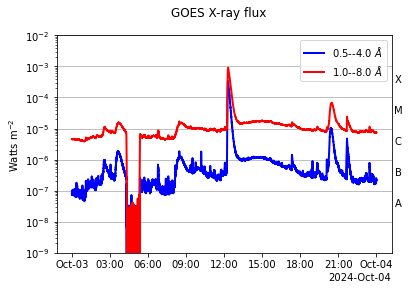

In [36]:
goes_16 = ts.TimeSeries(file_goes16)
goes_16.peek()

In [37]:
df = goes_16.to_dataframe()
df = df[(df["xrsa_quality"] == 0) & (df["xrsb_quality"] == 0)]
goes_16 = ts.TimeSeries(df, goes_16.meta, goes_16.units)

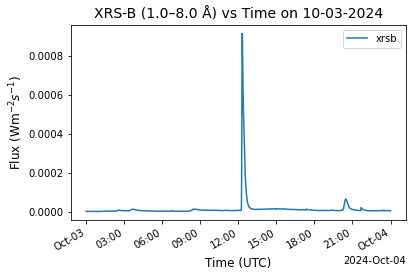

In [49]:
# Plot only XRS-B channel (1.0–8.0 Å)
fig, ax = plt.subplots()
goes_16.plot(axes=ax, columns=["xrsb"])
ax.set_title("XRS-B (1.0–8.0 Å) vs Time on 10-03-2024", fontsize=14)  
ax.set_xlabel("Time (UTC)", fontsize=12)                    
ax.set_ylabel("Flux (Wm$^{-2}$$s^{-1}$)", fontsize=12)
plt.show()

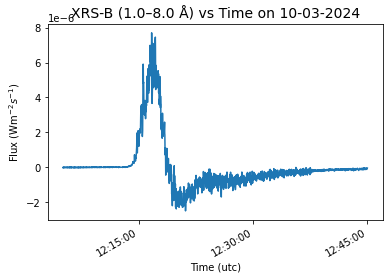

In [48]:
goes_flare = goes_16.truncate("2024-10-03 12:05", "2024-10-03 12:45")

time_support()
fig, ax = plt.subplots()
ax.plot(goes_flare.time, np.gradient(goes_flare.quantity("xrsb")))
ax.set_title("XRS-B (1.0–8.0 Å) vs Time on 10-03-2024", fontsize=14)  
ax.set_ylabel("Flux (Wm$^{-2}$$s^{-1}$)")
date_format = DateFormatter("%H:%M:%S")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
plt.show()

In [9]:
results = Fido.search(a.Time("2020-11-20 00:00", "2020-11-21 23:00"), a.Instrument("XRS"), a.Resolution("flx1s"))
print(results)

Results from 1 Provider:

4 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2020-11-20 00:00:00.000 2020-11-20 23:59:59.999 ...     NOAA      flx1s
2020-11-21 00:00:00.000 2020-11-21 23:59:59.999 ...     NOAA      flx1s
2020-11-20 00:00:00.000 2020-11-20 23:59:59.999 ...     NOAA      flx1s
2020-11-21 00:00:00.000 2020-11-21 23:59:59.999 ...     NOAA      flx1s




In [29]:
# solar cycle minimum
results_16 = Fido.search(a.Time("2019-12-20 00:00", "2019-12-21 23:00"), a.Instrument("XRS"),
                         a.goes.SatelliteNumber(16))
print(results_16)

Results from 1 Provider:

4 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2019-12-20 00:00:00.000 2019-12-20 23:59:59.999 ...     NOAA      flx1s
2019-12-21 00:00:00.000 2019-12-21 23:59:59.999 ...     NOAA      flx1s
2019-12-20 00:00:00.000 2019-12-20 23:59:59.999 ...     NOAA      avg1m
2019-12-21 00:00:00.000 2019-12-21 23:59:59.999 ...     NOAA      avg1m




Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

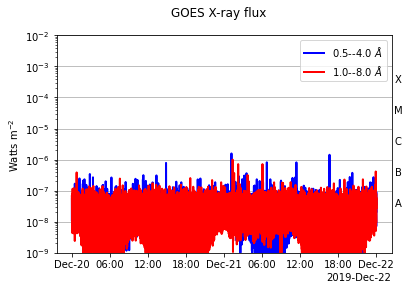

In [50]:
files = Fido.fetch(results_16)
# We use the `concatenate=True` keyword argument in TimeSeries, as
# we have two files and want to create one timeseries from them.
goes_16 = ts.TimeSeries(files, concatenate=True)
goes_16.peek()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries
import requests

# Step 1: Fetch Sunspot Data
url = "https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json"
response = requests.get(url)
solar_data = response.json()
solar_df = pd.DataFrame(solar_data)


In [3]:
from datetime import datetime, timedelta

# Function to generate smaller time ranges
def generate_time_ranges(start_date, end_date, delta):
    current_date = start_date
    while current_date < end_date:
        next_date = current_date + delta
        yield (current_date, next_date)
        current_date = next_date

# Define time range
start_date = datetime(2019, 12, 15)
end_date = datetime(2024, 12, 31)
delta = timedelta(days=30)  # Query in 30-day chunks

# Query data in smaller chunks
all_files = []
for tstart, tend in generate_time_ranges(start_date, end_date, delta):
    try:
        result = Fido.search(a.Time(tstart, tend),a.Instrument("XRS"),a.goes.SatelliteNumber(16))
        files = Fido.fetch(result)
        all_files.extend(files)
    except Exception as e:
        print(f"Error fetching data for {tstart} to {tend}: {e}")


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20191216_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191215_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191217_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191219_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191218_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191223_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191222_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191224_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191225_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191226_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191227_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191228_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191229_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191230_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20191231_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200101_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200102_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200103_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200104_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200105_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200106_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200107_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200109_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200108_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200110_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200111_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200112_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200113_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200114_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20200115_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200116_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200117_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200118_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200119_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200120_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200122_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200123_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200121_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200124_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200125_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200126_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200128_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200127_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200129_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200130_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200131_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200201_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

2024-12-06 08:20:17 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/02/sci_xrsf-l2-avg1m_g16_d20200202_v2-2-0.nc failed to download with exception
Download Failed: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/02/sci_xrsf-l2-avg1m_g16_d20200202_v2-2-0.nc with error <ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/02/sci_xrsf-l2-avg1m_g16_d20200202_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:20:17 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/02/sci_xrsf-l2-avg1m_g16_d20200203_v2-2-0.nc failed to download with exception
Download Fai

12/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20200213_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200214_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200215_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200216_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200217_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200218_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200219_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200220_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200221_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200222_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200224_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200223_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200225_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200226_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200227_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200228_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200301_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200229_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200302_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200303_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200304_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200305_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200306_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7fef2bf709d0>
Traceback (most recent call last):
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 683, in __del__
    self.close()
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/unix_events.py", line 61, in close
    self.remove_signal_handler(sig)
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/unix_events.py", line 150, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/naialum/opt/anaconda3/lib/python3.9/signal.py", line 47, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter


sci_xrsf-l2-avg1m_g16_d20200307_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200308_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200310_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200309_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200311_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200312_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200314_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200313_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20200316_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200317_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200315_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200318_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200319_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200320_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200321_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200322_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200323_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200325_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200324_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200326_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200327_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200328_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200329_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200330_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200331_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200401_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200402_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200403_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200404_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200405_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200406_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200407_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200408_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200409_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200410_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200411_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200412_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200413_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20200414_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200415_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200416_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200417_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200418_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200419_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200420_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200421_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200422_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200423_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200424_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200425_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200426_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200429_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200428_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200430_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:20:34 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/04/sci_xrsf-l2-avg1m_g16_d20200426_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/04/sci_xrsf-l2-avg1m_g16_d20200426_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:20:34 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/04/sci_xrsf-l2-avg1m_g16_d20200427_v2-2-0.nc failed to download with exception
Download Failed: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/04/sci_xrsf-l2-avg1m_g16_d20200427_v2-2-0.nc with error <ClientRespo

18/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20200513_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200515_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200514_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200516_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200517_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200518_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200519_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200521_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200520_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200523_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200522_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200524_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200525_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200526_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200527_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200528_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200529_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200530_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200531_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200601_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200602_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200603_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200605_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200604_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200606_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200608_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200607_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200609_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200610_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200611_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:20:41 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/06/sci_xrsf-l2-avg1m_g16_d20200605_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/06/sci_xrsf-l2-avg1m_g16_d20200605_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:20:41 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/06/sci_xrsf-l2-avg1m_g16_d20200609_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/06/sci_xrsf-l2-avg1m_g16_d20200609_v2-2-0.nc) [429 Too Many Requests]

5/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20200613_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200612_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200614_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200615_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200616_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200617_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200618_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200619_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200620_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200621_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200623_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200622_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200624_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200625_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200626_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200627_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200628_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200629_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200630_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200701_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200702_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200703_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200704_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200705_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200706_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200707_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200708_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200709_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200710_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200711_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200712_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20200714_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200715_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200713_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200716_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200717_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200718_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200719_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200720_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200721_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200722_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200723_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200724_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200726_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200725_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200727_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200729_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200728_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200731_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200730_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200801_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200802_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200803_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200804_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200805_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200806_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200807_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200808_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200809_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200811_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200810_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20200812_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200813_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200814_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200816_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200815_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200817_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200818_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200819_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200820_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200821_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200822_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200823_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200825_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200826_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200824_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200827_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200830_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200828_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200829_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200831_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200901_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200902_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200903_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200904_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200905_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200906_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200907_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200908_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200909_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200910_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20200911_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200912_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200913_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200915_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200914_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200916_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200917_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200918_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200919_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200920_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200921_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200922_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200923_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7fef2bf709d0>
Traceback (most recent call last):
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 683, in __del__
    self.close()
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/unix_events.py", line 61, in close
    self.remove_signal_handler(sig)
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/unix_events.py", line 150, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/naialum/opt/anaconda3/lib/python3.9/signal.py", line 47, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7fef2bf709d0>
Traceback (most recent call last):
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 683, in __del__
    self.close()
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyn

sci_xrsf-l2-avg1m_g16_d20200924_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200926_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200925_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200928_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200927_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200929_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20200930_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201001_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201005_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201006_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201007_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:21:08 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/10/sci_xrsf-l2-avg1m_g16_d20201001_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/10/sci_xrsf-l2-avg1m_g16_d20201001_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:21:08 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/10/sci_xrsf-l2-avg1m_g16_d20201002_v2-2-0.nc failed to download with exception
Download Failed: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/10/sci_xrsf-l2-avg1m_g16_d20201002_v2-2-0.nc with error <ClientRespo

10/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20201012_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201010_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201013_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201011_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201014_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201015_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201017_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201018_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201016_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201019_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201020_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201021_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201022_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201023_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201024_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201025_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201026_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201027_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201028_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201029_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201030_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201031_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201101_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201102_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201103_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201104_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201105_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201106_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201107_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201108_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201109_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20201110_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201111_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201112_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201114_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201113_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201115_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201116_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201117_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201118_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201119_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201122_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201123_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201125_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201124_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201126_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201127_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201128_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201129_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201130_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201201_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201202_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201203_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201205_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201204_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201206_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201208_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201207_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201209_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/61 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20201210_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201211_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201213_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201214_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201212_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201215_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201216_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201217_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201218_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201220_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201219_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201221_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201223_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201222_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201224_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201225_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201226_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201227_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201229_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20201228_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210101_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210103_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210102_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:21:27 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/12/sci_xrsf-l2-avg1m_g16_d20201228_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/12/sci_xrsf-l2-avg1m_g16_d20201228_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:21:27 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/12/sci_xrsf-l2-avg1m_g16_d20201230_v2-2-0.nc failed to download with exception
Download Failed: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2020/12/sci_xrsf-l2-avg1m_g16_d20201230_v2-2-0.nc with error <ClientRespo

11/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20210108_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210110_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210109_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210111_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210112_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210113_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210114_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210115_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210117_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210116_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210118_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210119_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210120_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210121_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210122_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210123_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210124_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210125_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210126_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210127_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210128_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210129_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210130_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210131_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210201_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210202_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210203_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210204_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210205_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210206_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210207_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20210208_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210209_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210211_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210210_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210212_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210213_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210214_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210215_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210216_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210217_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210218_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210219_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210220_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210221_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210222_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210223_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210224_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210225_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210226_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210227_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210228_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210301_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210302_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210303_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210305_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210304_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210306_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210307_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210308_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210309_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20210310_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210311_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210312_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210314_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210313_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210315_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210316_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210317_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210318_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210319_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210320_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210321_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210322_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210323_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210324_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:21:45 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/03/sci_xrsf-l2-avg1m_g16_d20210320_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/03/sci_xrsf-l2-avg1m_g16_d20210320_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:21:45 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/03/sci_xrsf-l2-avg1m_g16_d20210321_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/03/sci_xrsf-l2-avg1m_g16_d20210321_v2-2-0.nc) [429 Too Many Requests]

20/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20210410_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210409_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210408_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210411_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210412_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210413_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210414_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210415_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210416_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210417_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210418_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210419_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210420_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210421_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210423_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210422_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210424_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210425_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210426_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210428_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210427_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210429_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210430_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210501_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210503_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210502_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210504_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210505_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210506_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210507_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:21:53 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/05/sci_xrsf-l2-avg1m_g16_d20210506_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/05/sci_xrsf-l2-avg1m_g16_d20210506_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:21:53 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/05/sci_xrsf-l2-avg1m_g16_d20210507_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/05/sci_xrsf-l2-avg1m_g16_d20210507_v2-2-0.nc) [429 Too Many Requests]

3/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20210510_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210511_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210508_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210509_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210512_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210513_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210514_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210515_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210516_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210517_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210518_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210519_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210520_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210521_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210522_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210523_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210524_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210525_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210526_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210527_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210528_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210529_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210530_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210531_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210602_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210601_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210603_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:21:59 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/06/sci_xrsf-l2-avg1m_g16_d20210603_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/06/sci_xrsf-l2-avg1m_g16_d20210603_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:21:59 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/06/sci_xrsf-l2-avg1m_g16_d20210604_v2-2-0.nc failed to download with exception
Download Failed: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/06/sci_xrsf-l2-avg1m_g16_d20210604_v2-2-0.nc with error <ClientRespo

5/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20210607_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210608_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210609_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210610_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210611_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210612_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210613_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210615_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210614_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210616_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:22:02 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/06/sci_xrsf-l2-avg1m_g16_d20210611_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/06/sci_xrsf-l2-avg1m_g16_d20210611_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:22:02 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/06/sci_xrsf-l2-avg1m_g16_d20210613_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/06/sci_xrsf-l2-avg1m_g16_d20210613_v2-2-0.nc) [429 Too Many Requests]

25/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20210708_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210707_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210709_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210710_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210711_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210712_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210713_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210714_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210715_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210716_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210717_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210718_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210719_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210720_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210721_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210722_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210723_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210724_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210725_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210726_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210727_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210728_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210730_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210729_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210731_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210801_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210802_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210803_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210804_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210805_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210806_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20210809_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210807_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210808_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210810_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210811_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210812_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210814_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210813_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210815_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210816_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210817_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210818_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210819_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210820_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210821_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210824_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210823_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210825_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210826_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210827_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210828_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210822_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:22:15 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/08/sci_xrsf-l2-avg1m_g16_d20210821_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/08/sci_xrsf-l2-avg1m_g16_d20210821_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:22:15 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/08/sci_xrsf-l2-avg1m_g16_d20210822_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/08/sci_xrsf-l2-avg1m_g16_d20210822_v2-2-0.nc) [429 Too Many Requests]

11/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20210906_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210907_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210908_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210905_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210909_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210910_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210911_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210912_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210913_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210914_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210915_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210916_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210917_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210919_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210918_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210921_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210920_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210922_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210923_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210924_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210925_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210926_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210927_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210928_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210929_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20210930_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211001_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211002_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211003_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211004_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211005_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20211006_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211007_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211009_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211008_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211010_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211012_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211011_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211013_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211014_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211015_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211016_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211017_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211018_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:22:26 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/10/sci_xrsf-l2-avg1m_g16_d20211017_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/10/sci_xrsf-l2-avg1m_g16_d20211017_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:22:26 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/10/sci_xrsf-l2-avg1m_g16_d20211018_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2021/10/sci_xrsf-l2-avg1m_g16_d20211018_v2-2-0.nc) [429 Too Many Requests]

19/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20211106_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211107_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211105_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211104_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211108_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211109_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211110_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211111_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211112_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211113_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211114_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211115_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211117_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211116_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211118_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211119_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211120_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211121_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211122_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211123_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211124_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211125_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211126_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211127_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211128_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211129_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211130_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211203_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211202_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211201_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211204_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20211205_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211206_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211207_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211208_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211209_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211210_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211211_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211212_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211213_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211214_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211215_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211216_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211217_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211219_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211218_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211220_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211221_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211222_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211223_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211224_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211225_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211226_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211227_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211228_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211229_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211230_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20211231_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220101_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220102_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220103_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20220104_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220105_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220106_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220107_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220108_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220109_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220110_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220111_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220112_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220114_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220113_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220115_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220116_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220117_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220118_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220119_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:22:45 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/01/sci_xrsf-l2-avg1m_g16_d20220118_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/01/sci_xrsf-l2-avg1m_g16_d20220118_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:22:45 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/01/sci_xrsf-l2-avg1m_g16_d20220119_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/01/sci_xrsf-l2-avg1m_g16_d20220119_v2-2-0.nc) [429 Too Many Requests]

16/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20220202_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220204_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220203_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220205_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220206_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220207_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220208_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220209_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220210_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220211_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220213_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220212_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220214_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220215_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220216_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220217_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220218_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220219_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220220_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220221_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220222_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220223_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220224_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220225_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220226_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220227_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220228_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220301_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220302_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220303_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220304_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20220305_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220306_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220307_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220308_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220309_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220310_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220311_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220312_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220313_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220314_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220315_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220316_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220317_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220318_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220319_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220320_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220321_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220322_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220323_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220324_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220325_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220326_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:22:58 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/03/sci_xrsf-l2-avg1m_g16_d20220325_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/03/sci_xrsf-l2-avg1m_g16_d20220325_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:22:58 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/03/sci_xrsf-l2-avg1m_g16_d20220326_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/03/sci_xrsf-l2-avg1m_g16_d20220326_v2-2-0.nc) [429 Too Many Requests]

10/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20220403_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220405_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220404_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220406_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220407_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220408_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220409_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220410_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220412_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220411_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220413_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220414_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220415_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220416_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220417_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220418_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220419_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220420_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220421_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220422_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220423_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220424_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220425_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220426_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220428_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220427_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220429_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220430_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220502_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220501_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220503_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20220504_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220505_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220507_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220508_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220506_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220509_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220510_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220511_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220512_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220514_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220513_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220515_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220516_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220517_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220518_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220519_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220520_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220521_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220522_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220523_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220524_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220525_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220526_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220527_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220528_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220529_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220531_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220530_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220601_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220602_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20220603_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220605_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220604_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220606_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220607_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220608_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220609_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220611_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:23:15 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/06/sci_xrsf-l2-avg1m_g16_d20220607_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/06/sci_xrsf-l2-avg1m_g16_d20220607_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:23:15 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/06/sci_xrsf-l2-avg1m_g16_d20220608_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/06/sci_xrsf-l2-avg1m_g16_d20220608_v2-2-0.nc) [429 Too Many Requests]

26/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20220702_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220704_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220703_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220705_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220706_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220707_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220708_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220709_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220710_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220711_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220712_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220713_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220714_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220716_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220715_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220717_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220718_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220719_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220720_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220721_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220722_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220723_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220725_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220724_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220726_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220727_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220728_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220729_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220730_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220731_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220801_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20220802_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220803_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220804_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220805_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220806_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220807_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220808_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220809_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:23:26 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/08/sci_xrsf-l2-avg1m_g16_d20220806_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/08/sci_xrsf-l2-avg1m_g16_d20220806_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:23:26 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/08/sci_xrsf-l2-avg1m_g16_d20220808_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/08/sci_xrsf-l2-avg1m_g16_d20220808_v2-2-0.nc) [429 Too Many Requests]

25/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20220901_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220902_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220903_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220831_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220904_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220905_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220906_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220907_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220908_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220909_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220910_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220911_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220913_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220912_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220914_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220915_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220916_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220917_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220919_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220918_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220920_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220922_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220921_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220923_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220924_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220925_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220926_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220927_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220928_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220929_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20220930_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20221001_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221005_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221002_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221004_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221003_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221006_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221007_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221008_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221009_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221010_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221011_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221013_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221012_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221014_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221015_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221016_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221018_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221017_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221019_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221020_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221022_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221021_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221023_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221024_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221025_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221026_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221027_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221028_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221029_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221030_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20221031_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221101_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221103_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221104_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221102_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221105_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221106_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221107_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221108_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221109_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221110_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221111_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221113_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221112_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221114_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221115_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221116_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221117_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221118_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221119_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221120_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221122_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221121_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221123_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221124_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221125_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221127_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221128_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221126_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:23:47 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/11/sci_xrsf-l2-avg1m_g16_d20221126_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/11/sci_xrsf-l2-avg1m_g16_d20221126_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:23:47 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/11/sci_xrsf-l2-avg1m_g16_d20221128_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/11/sci_xrsf-l2-avg1m_g16_d20221128_v2-2-0.nc) [429 Too Many Requests]

3/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20221129_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221130_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221201_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221202_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221203_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221204_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221205_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221206_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221207_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221208_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221209_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221210_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221211_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221212_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221213_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221214_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221215_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221216_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221217_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221218_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221219_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221220_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221221_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221222_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221223_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221228_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:23:52 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/12/sci_xrsf-l2-avg1m_g16_d20221223_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/12/sci_xrsf-l2-avg1m_g16_d20221223_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:23:52 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/12/sci_xrsf-l2-avg1m_g16_d20221224_v2-2-0.nc failed to download with exception
Download Failed: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2022/12/sci_xrsf-l2-avg1m_g16_d20221224_v2-2-0.nc with error <ClientRespo

7/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20221229_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221230_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20221231_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20230219_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230221_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230222_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230223_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230224_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230225_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230226_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230227_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20230228_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230301_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230302_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230303_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230304_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230305_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230306_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230307_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230308_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230309_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230310_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230311_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230312_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230313_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230314_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230315_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230316_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230317_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230318_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230319_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230320_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230321_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230322_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230323_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230324_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7fef2bf709d0>
Traceback (most recent call last):
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 683, in __del__
    self.close()
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/unix_events.py", line 61, in close
    self.remove_signal_handler(sig)
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/unix_events.py", line 150, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/naialum/opt/anaconda3/lib/python3.9/signal.py", line 47, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7fef2bf709d0>
Traceback (most recent call last):
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 683, in __del__
    self.close()
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyn

sci_xrsf-l2-avg1m_g16_d20230326_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230325_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230328_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230327_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230329_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/60 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20230330_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230331_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230401_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230402_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230403_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230404_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230405_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230406_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230407_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230408_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230410_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230409_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230411_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230412_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230413_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230414_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230415_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230416_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230417_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230418_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:24:09 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/04/sci_xrsf-l2-avg1m_g16_d20230415_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/04/sci_xrsf-l2-avg1m_g16_d20230415_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:24:09 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/04/sci_xrsf-l2-avg1m_g16_d20230417_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/04/sci_xrsf-l2-avg1m_g16_d20230417_v2-2-0.nc) [429 Too Many Requests]

13/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20230430_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230501_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230429_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230428_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230502_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:24:12 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/04/sci_xrsf-l2-avg1m_g16_d20230428_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/04/sci_xrsf-l2-avg1m_g16_d20230428_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:24:12 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/05/sci_xrsf-l2-avg1m_g16_d20230502_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/05/sci_xrsf-l2-avg1m_g16_d20230502_v2-2-0.nc) [429 Too Many Requests]

28/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20230528_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230529_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230530_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230601_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230531_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230602_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230603_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230604_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230606_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230605_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230607_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230608_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230609_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230610_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230611_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230612_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230613_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230614_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230615_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230616_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230617_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230618_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230619_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230620_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230621_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230622_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230623_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230624_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230626_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230625_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230627_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20230628_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230629_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230701_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230630_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230702_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230703_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230704_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230705_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230706_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230707_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230708_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230709_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230710_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230711_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230713_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230712_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230714_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230715_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230717_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230716_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230718_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230719_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230720_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230721_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230723_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230722_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230725_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230726_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230724_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230727_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20230728_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230730_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230729_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230731_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230801_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230802_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230803_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230804_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230805_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230806_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230807_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230808_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230809_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230810_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230811_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230812_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230813_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230814_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230815_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230816_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230817_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230818_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230819_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230820_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230821_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230822_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230823_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230824_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230825_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230826_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:24:33 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/08/sci_xrsf-l2-avg1m_g16_d20230826_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/08/sci_xrsf-l2-avg1m_g16_d20230826_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>



1/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20230826_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230827_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230828_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230829_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230830_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230831_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230902_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230901_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230903_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230904_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230908_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230909_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230910_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:24:36 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/08/sci_xrsf-l2-avg1m_g16_d20230830_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/08/sci_xrsf-l2-avg1m_g16_d20230830_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:24:36 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/09/sci_xrsf-l2-avg1m_g16_d20230902_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/09/sci_xrsf-l2-avg1m_g16_d20230902_v2-2-0.nc) [429 Too Many Requests]

23/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20230925_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230926_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230927_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230928_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230929_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231001_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231002_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231003_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231004_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231005_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20230930_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231006_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231007_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231008_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231009_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231010_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231011_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231012_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231013_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231014_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231015_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231016_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231018_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231017_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231020_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231019_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231022_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231021_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231023_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231024_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231025_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20231026_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231027_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231028_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231029_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231030_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231031_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231101_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231102_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231103_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231104_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231105_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231106_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231107_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231109_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231108_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231110_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231111_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231112_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231113_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231114_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231115_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231116_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231117_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231118_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231119_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231120_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231121_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231122_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231123_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231124_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20231125_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231126_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231127_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231128_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231129_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231130_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231202_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231201_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231203_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231204_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231205_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231206_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231207_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231208_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231209_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231210_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231211_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:24:56 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/12/sci_xrsf-l2-avg1m_g16_d20231210_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/12/sci_xrsf-l2-avg1m_g16_d20231210_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:24:56 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/12/sci_xrsf-l2-avg1m_g16_d20231211_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2023/12/sci_xrsf-l2-avg1m_g16_d20231211_v2-2-0.nc) [429 Too Many Requests]

15/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20231224_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231225_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231227_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231226_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231228_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231229_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231230_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20231231_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240102_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240101_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240103_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240104_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240105_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240106_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240107_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240108_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240109_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240110_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240111_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240112_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240113_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240114_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240115_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240116_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240117_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240118_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240119_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240120_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240121_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240122_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240123_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20240124_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240125_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240126_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240128_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240127_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240129_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240130_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240131_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240201_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240204_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240203_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240205_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240202_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240206_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240207_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240208_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240209_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240210_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240211_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240212_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240213_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240214_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240215_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240216_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240217_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240218_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240219_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240220_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:25:09 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/02/sci_xrsf-l2-avg1m_g16_d20240218_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/02/sci_xrsf-l2-avg1m_g16_d20240218_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:25:09 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/02/sci_xrsf-l2-avg1m_g16_d20240219_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/02/sci_xrsf-l2-avg1m_g16_d20240219_v2-2-0.nc) [429 Too Many Requests]

5/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20240222_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240223_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240224_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240225_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240226_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240227_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240229_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240301_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240228_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240302_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240303_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240304_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240305_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240306_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240307_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240308_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240309_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240310_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240311_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240312_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240313_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240314_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240316_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240315_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240317_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240318_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240319_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240320_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240321_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240322_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7fef2bf709d0>
Traceback (most recent call last):
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 683, in __del__
    self.close()
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/unix_events.py", line 61, in close
    self.remove_signal_handler(sig)
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/unix_events.py", line 150, in remove_signal_handler
    signal.signal(sig, handler)
  File "/Users/naialum/opt/anaconda3/lib/python3.9/signal.py", line 47, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7fef2bf709d0>
Traceback (most recent call last):
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 683, in __del__
    self.close()
  File "/Users/naialum/opt/anaconda3/lib/python3.9/asyn

sci_xrsf-l2-avg1m_g16_d20240323_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20240324_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240325_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240327_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240326_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240328_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240329_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240330_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240331_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240401_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240402_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240403_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240404_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240405_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240406_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240407_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240408_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240409_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240410_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240411_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240412_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240413_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240414_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240415_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240416_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240417_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240418_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240419_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240420_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240422_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:25:23 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/04/sci_xrsf-l2-avg1m_g16_d20240420_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/04/sci_xrsf-l2-avg1m_g16_d20240420_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:25:23 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/04/sci_xrsf-l2-avg1m_g16_d20240421_v2-2-0.nc failed to download with exception
Download Failed: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/04/sci_xrsf-l2-avg1m_g16_d20240421_v2-2-0.nc with error <ClientRespo

2/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20240423_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240426_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240424_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240425_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240427_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240429_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240430_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240501_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240502_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240503_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

2024-12-06 08:25:25 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/04/sci_xrsf-l2-avg1m_g16_d20240427_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/04/sci_xrsf-l2-avg1m_g16_d20240427_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:25:25 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/04/sci_xrsf-l2-avg1m_g16_d20240428_v2-2-0.nc failed to download with exception
Download Failed: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/04/sci_xrsf-l2-avg1m_g16_d20240428_v2-2-0.nc with error <ClientRespo

24/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20240522_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240523_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240525_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240524_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240526_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240527_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240528_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240529_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240530_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240531_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240601_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240602_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240603_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240604_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240605_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240606_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240607_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240608_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240609_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240610_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240611_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240612_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240614_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240613_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240615_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240616_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240617_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240618_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240619_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240620_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240621_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20240622_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240623_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240624_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240625_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240626_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240627_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240628_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240629_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240630_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240701_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240702_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240703_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240704_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240705_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240706_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240707_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240708_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240709_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240710_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240711_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240712_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240713_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240714_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240715_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240716_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240717_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240718_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240719_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240720_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240721_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:25:40 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/07/sci_xrsf-l2-avg1m_g16_d20240720_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/07/sci_xrsf-l2-avg1m_g16_d20240720_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:25:40 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/07/sci_xrsf-l2-avg1m_g16_d20240721_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/07/sci_xrsf-l2-avg1m_g16_d20240721_v2-2-0.nc) [429 Too Many Requests]

2/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20240721_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240722_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240723_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240724_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240725_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240727_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240726_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240728_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240729_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240730_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240731_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240801_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240802_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240803_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240804_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240805_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240806_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240807_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240808_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240809_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240810_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240811_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240812_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240813_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240814_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240815_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240816_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240817_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240818_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240819_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240820_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20240822_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240821_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240823_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240824_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240825_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240826_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240827_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240828_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240829_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240830_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240831_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240902_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240901_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240903_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240904_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240905_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240906_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240907_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240910_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240908_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240909_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240911_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240912_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240914_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240913_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240915_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240916_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240917_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240918_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240919_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20240921_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240922_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240920_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240923_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240924_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240925_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240926_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240927_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240928_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240929_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240930_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241001_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241002_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241003_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241004_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241005_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241006_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241007_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241008_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241009_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241010_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241011_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241012_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241013_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241014_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241015_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241016_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241017_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241018_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241019_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/62 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20241020_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241021_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241023_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241022_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241024_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241025_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241026_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241027_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241029_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241028_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241030_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241031_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241101_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241102_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241103_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

2024-12-06 08:26:05 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/11/sci_xrsf-l2-avg1m_g16_d20241103_v2-2-0.nc failed to download with exception
<ClientResponse(https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/11/sci_xrsf-l2-avg1m_g16_d20241103_v2-2-0.nc) [429 Too Many Requests]>
<CIMultiDictProxy('Content-Length': '117', 'Cache-Control': 'no-cache', 'Content-Type': 'text/html', 'Connection': 'close')>

2024-12-06 08:26:05 - parfive - INFO: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/11/sci_xrsf-l2-avg1m_g16_d20241104_v2-2-0.nc failed to download with exception
Download Failed: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/11/sci_xrsf-l2-avg1m_g16_d20241104_v2-2-0.nc with error <ClientRespo

16/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/32 [00:00<?, ?file/s]

sci_xrsf-l2-flx1s_g16_d20241203_v2-2-0.nc:   0%|          | 0.00/4.87M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241119_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241121_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241118_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241120_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241122_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241123_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241124_v2-2-0.nc:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241125_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241126_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241127_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241128_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241129_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241130_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241201_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241202_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241203_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Files Downloaded: 0file [00:00, ?file/s]

In [4]:
from sunpy.timeseries import TimeSeries

goes_ts = TimeSeries(all_files, concatenate=True)
goes_xrsb = goes_ts.to_dataframe()
goes_xrsb.index = pd.to_datetime(goes_xrsb.index)  
monthly_xrsb = goes_xrsb['xrsb'].resample('M').mean() 

if solar_df.index.name != 'time-tag':
    solar_df.set_index('time-tag', inplace=True)
combined_data = pd.merge(
    solar_df.resample('M').mean(),  
    monthly_xrsb,
    left_index=True,
    right_index=True,
    how="inner"
)

KeyboardInterrupt: 

In [5]:
from scipy.stats import linregress

plt.scatter(combined_data['ssn'], combined_data['xrsb'], color="purple", alpha=0.7)
plt.xlabel("Monthly Sunspot Numbers")
plt.ylabel("Average Monthly X-Ray Flux (W/m²)")
plt.title("Monthly Sunspot Numbers vs. X-Ray Flux")
plt.grid()
plt.show()

x = combined_data['ssn']
y = combined_data['xrsb']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

plt.scatter(x, y, color="purple", alpha=0.7, label="Data Points")
plt.plot(x, regression_line, color="red", label=f"y = {slope:.2e}x + {intercept:.2e}\nR² = {r_value**2:.2f}")
plt.xlabel("Monthly Sunspot Numbers", fontsize=12)
plt.ylabel("Average Monthly X-Ray Flux (W/m²)", fontsize=12)
plt.title("Monthly Sunspot Numbers vs. X-Ray Flux", fontsize=14)
plt.legend(fontsize=10)
plt.grid()
plt.show()


NameError: name 'combined_data' is not defined

In [2]:
solar_df['time-tag'] = pd.to_datetime(solar_df['time-tag'], format='%Y-%m')
solar_df = solar_df[['time-tag', 'ssn']]  # Keep only time-tag and ssn columns
tstart = "2019-12-15"
tend = "2024-12-31"
result = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"))
files = Fido.fetch(result)

Files Downloaded:   0%|          | 0/7530 [00:00<?, ?file/s]

In [1]:
# Check if time-tag is already the index
if solar_df.index.name != 'time-tag':
    solar_df.set_index('time-tag', inplace=True)

# Merge sunspot data with GOES X-ray flux data
combined_data = pd.merge(
    solar_df.resample('M').mean(),  # Ensure monthly resampling
    monthly_xrsb,
    left_index=True,
    right_index=True,
    how="inner"
)

# Plot scatter plot
plt.scatter(combined_data['ssn'], combined_data['xrsb'], color="purple", alpha=0.7)
plt.xlabel("Monthly Sunspot Numbers")
plt.ylabel("Average Monthly X-Ray Flux (W/m²)")
plt.title("Monthly Sunspot Numbers vs. X-Ray Flux")
plt.grid()
plt.show()

NameError: name 'solar_df' is not defined

In [2]:
from scipy.stats import linregress

# Perform linear regression
x = combined_data['ssn']
y = combined_data['xrsb']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Scatter plot
plt.scatter(x, y, color="purple", alpha=0.7, label="Data Points")
plt.plot(x, regression_line, color="red", label=f"y = {slope:.2e}x + {intercept:.2e}\nR² = {r_value**2:.2f}")
plt.xlabel("Monthly Sunspot Numbers", fontsize=12)
plt.ylabel("Average Monthly X-Ray Flux (W/m²)", fontsize=12)
plt.title("Monthly Sunspot Numbers vs. X-Ray Flux", fontsize=14)
plt.legend(fontsize=10)
plt.grid()
plt.show()


NameError: name 'combined_data' is not defined